In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True


2024-07-28 21:19:42.122354: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-28 21:19:42.122375: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-28 21:19:42.122379: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-28 21:19:42.122408: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-28 21:19:42.122423: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 3
MTD:

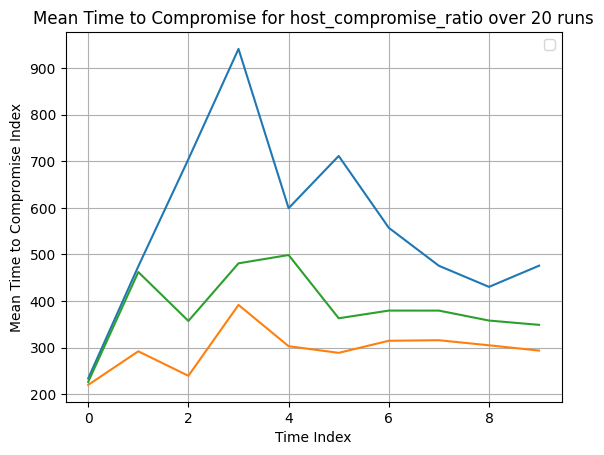

In [4]:
# Initialize an empty DataFrame
all_runs_df = pd.DataFrame()
features = ["host_compromise_ratio"]
model = "main_network_final_host_compromise_ratio"
for run_index in range(1,21):
    
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp(run_index))
    
    # Append the data to the all_runs_df DataFrame
    all_runs_df = pd.concat([all_runs_df, eva], axis=1)

# Filter columns that include "Mean Time to Compromise"
mean_time_columns = all_runs_df[all_runs_df.filter(like='Mean Time to Compromise').columns]
time_columns = all_runs_df[all_runs_df.filter(like='Time').columns]
# Find the max value of each row
all_runs_df['Max'] = mean_time_columns.max(axis=1)
# Find the min value of each row
all_runs_df['Min'] = mean_time_columns.min(axis=1)
# Find the median value of each row
all_runs_df['Median'] = mean_time_columns.median(axis=1)
# Calculate 75th percentile (top 25%) and 25th percentile (bottom 25%)
all_runs_df['75th Percentile'] = mean_time_columns.quantile(0.75, axis=1)
all_runs_df['25th Percentile'] = mean_time_columns.quantile(0.25, axis=1)

# Plot
plt.plot(all_runs_df['75th Percentile'])
plt.plot(all_runs_df['25th Percentile'])
plt.plot(all_runs_df['Median'])
plt.ylabel('Mean Time to Compromise Index')
plt.xlabel('Time Index')
plt.title(f'Mean Time to Compromise for {features[0]} over 20 runs')
plt.grid(True)
plt.legend()
plt.show()



Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 0
Static period: 0
Action: 2
MTD: IPShuffle triggered 0.0s
Static period: 100.58533784797278
Action: 1
MTD: IPShuffle triggered 100.6s
MTD: Interrupted EXPLOIT_VULN at 110.0s!
Static period: 90.72166817111805
Action: 2
MTD: IPShuffle triggered 200.7s
Static period: 100.63931426487812
Action: 4
MTD: IPShuffle triggered 301.4s
MTD: Interrupted EXPLOIT_VULN at 311.1s!
Static period: 90.47740680405741
Action: 0
Static period: 90.47740680405741
Action: 2
MTD: IPShuffle triggered 401.6s
Static period: 100.8394115475507
Action: 2
MTD: IPShuffle triggered 502.5s
MTD: Interrupted EXPLOIT_VULN at 512.0s!
Static period: 91.09100675596392
Action: 3
MTD: IPShuffle triggered 603.1s
Static period: 100.2911033547282
Action: 2
MTD: OSDiversity triggered 703.4s
MTD: Interrupted BRUTE_FORCE at 714.3s!
Static period: 20.220149105038

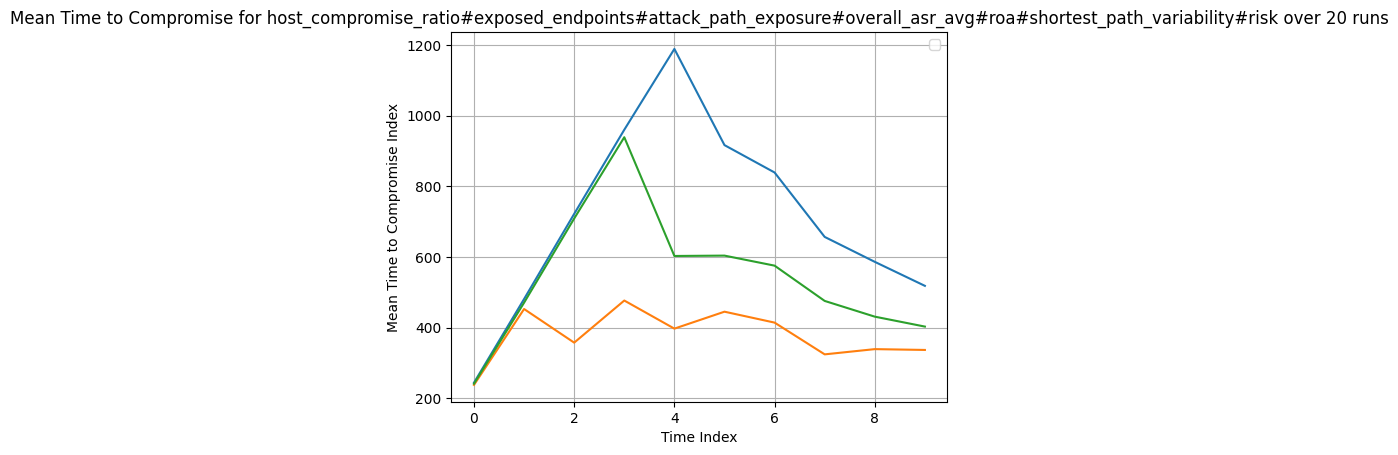

In [5]:
# Initialize an empty DataFrame
all_runs_df = pd.DataFrame()
features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
model = "main_network_final_host_compromise_ratio#exposed_endpoints#attack_path_exposure#overall_asr_avg#roa#shortest_path_variability#risk"
for run_index in range(1,21):
    
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp(run_index))
    
    # Append the data to the all_runs_df DataFrame
    all_runs_df = pd.concat([all_runs_df, eva], axis=1)

# Filter columns that include "Mean Time to Compromise"
mean_time_columns = all_runs_df[all_runs_df.filter(like='Mean Time to Compromise').columns]
time_columns = all_runs_df[all_runs_df.filter(like='Time').columns]
# Find the max value of each row
all_runs_df['Max'] = mean_time_columns.max(axis=1)
# Find the min value of each row
all_runs_df['Min'] = mean_time_columns.min(axis=1)
# Find the median value of each row
all_runs_df['Median'] = mean_time_columns.median(axis=1)
# Calculate 75th percentile (top 25%) and 25th percentile (bottom 25%)
all_runs_df['75th Percentile'] = mean_time_columns.quantile(0.75, axis=1)
all_runs_df['25th Percentile'] = mean_time_columns.quantile(0.25, axis=1)

# Plot
plt.plot(all_runs_df['75th Percentile'])
plt.plot(all_runs_df['25th Percentile'])
plt.plot(all_runs_df['Median'])
plt.ylabel('Mean Time to Compromise Index')
plt.xlabel('Time Index')
plt.title(f'Mean Time to Compromise for {"#".join(features)} over 20 runs')
plt.grid(True)
plt.legend()
plt.show()



Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
Static period: 100.18049798579752
Action: 1
MTD: CompleteTopologyShuffle triggered 100.2s
MTD: Interrupted EXPLOIT_VULN at 120.8s!
Static period: 79.99795962526753
Action: 0
Static period: 79.99795962526753
Action: 1
MTD: CompleteTopologyShuffle triggered 200.8s
Static period: 100.32190525796648
Action: 4
MTD: CompleteTopologyShuffle triggered 301.1s
MTD: Interrupted SCAN_PORT at 321.4s!
Static period: 81.15011066781318
Action: 0
Static period: 81.15011066781318
Action: 0
Static period: 81.15011066781318
Action: 2
MTD: CompleteTopologyShuffle triggered 402.5s
Static period: 101.77524938497629
Action: 1
MTD: CompleteTopologyShuffle triggered 504.3s
MTD: Interrupted SCAN_PORT at 522.7s!
Static period: 82.1894037193091
Action: 3
MTD: CompleteTopologyShuffle triggered 604

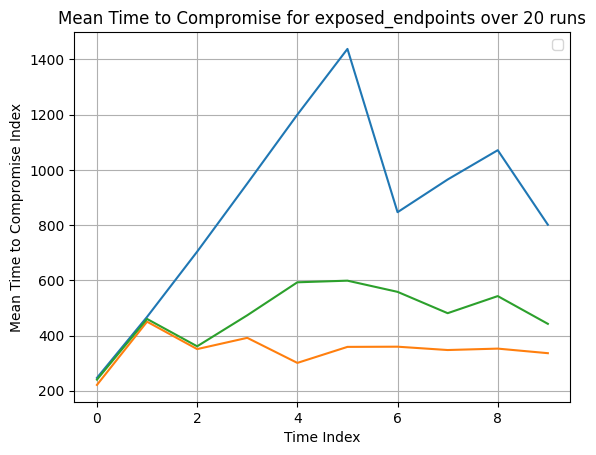

In [6]:
# Initialize an empty DataFrame
all_runs_df = pd.DataFrame()
features = ["exposed_endpoints"]
model = "main_network_final_exposed_endpoints"
for run_index in range(1,21):
    
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp(run_index))
    
    # Append the data to the all_runs_df DataFrame
    all_runs_df = pd.concat([all_runs_df, eva], axis=1)

# Filter columns that include "Mean Time to Compromise"
mean_time_columns = all_runs_df[all_runs_df.filter(like='Mean Time to Compromise').columns]
time_columns = all_runs_df[all_runs_df.filter(like='Time').columns]
# Find the max value of each row
all_runs_df['Max'] = mean_time_columns.max(axis=1)
# Find the min value of each row
all_runs_df['Min'] = mean_time_columns.min(axis=1)
# Find the median value of each row
all_runs_df['Median'] = mean_time_columns.median(axis=1)
# Calculate 75th percentile (top 25%) and 25th percentile (bottom 25%)
all_runs_df['75th Percentile'] = mean_time_columns.quantile(0.75, axis=1)
all_runs_df['25th Percentile'] = mean_time_columns.quantile(0.25, axis=1)

# Plot
plt.plot(all_runs_df['75th Percentile'])
plt.plot(all_runs_df['25th Percentile'])
plt.plot(all_runs_df['Median'])
plt.ylabel('Mean Time to Compromise Index')
plt.xlabel('Time Index')
plt.title(f'Mean Time to Compromise for {"#".join(features)} over 20 runs')
plt.grid(True)
plt.legend()
plt.show()

